# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [40]:
# The dataset is the result of 17 marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score


In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4060,25,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
830,49,entrepreneur,married,basic.9y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
7235,52,blue-collar,married,basic.4y,no,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
21524,58,technician,divorced,professional.course,unknown,yes,no,cellular,aug,tue,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
13302,36,technician,married,professional.course,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32829,27,entrepreneur,married,university.degree,no,yes,no,cellular,may,mon,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4302,36,blue-collar,married,unknown,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
14695,34,management,married,high.school,no,yes,no,cellular,jul,tue,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
11098,32,technician,married,university.degree,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
34651,48,services,divorced,basic.9y,no,unknown,unknown,cellular,may,thu,...,7,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
#There are no null values. No datatypes changes needed.
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [8]:
# Remove duplicates
df.duplicated().sum()
df = df.drop_duplicates()

In [9]:
#Underatand Numerical features, categorical features
numerical_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(exclude=np.number).columns
print(numerical_features)
print(categorical_features)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [10]:
#Remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        df['z_score'] = (df[col] - df[col].mean()) / df[col].std()
        df = df[df['z_score'].abs() <= threshold]
        df = df.drop(columns=['z_score'])
    return df

# Remove outliers from features
df = remove_outliers_zscore(df,['age','duration','campaign'])

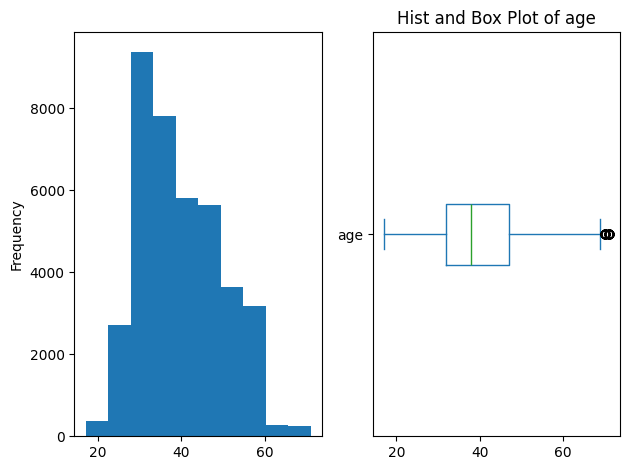

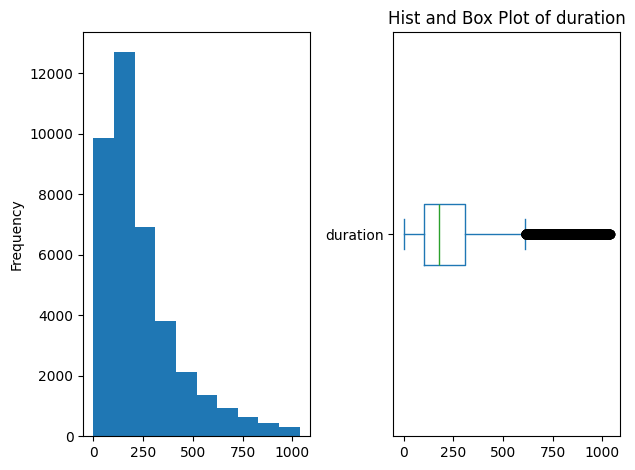

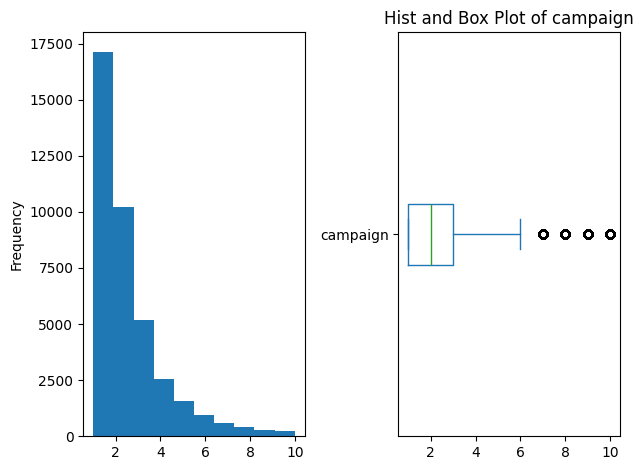

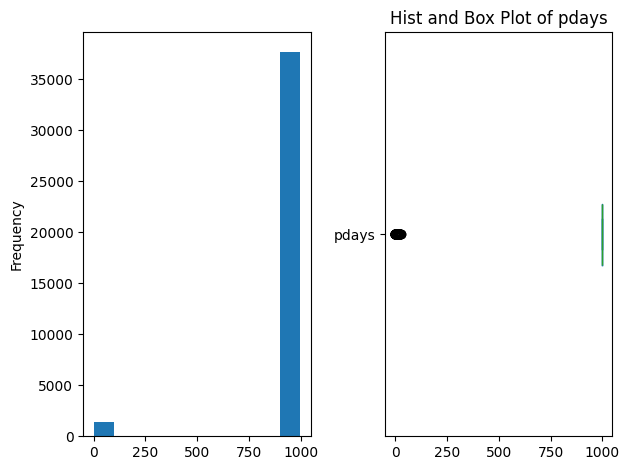

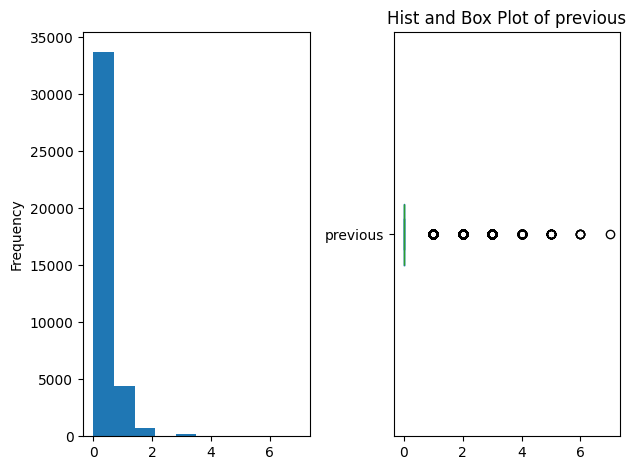

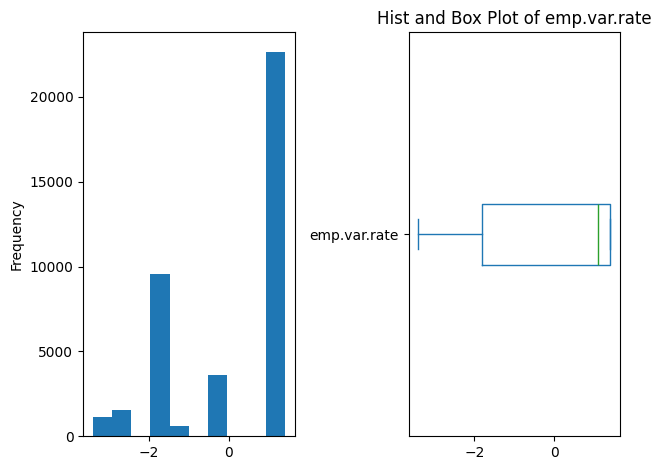

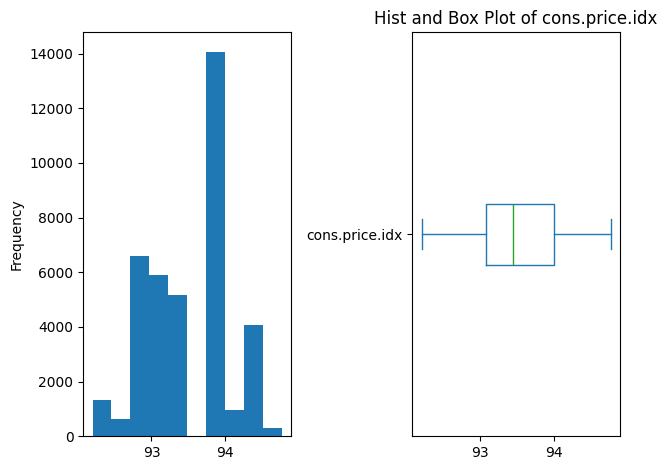

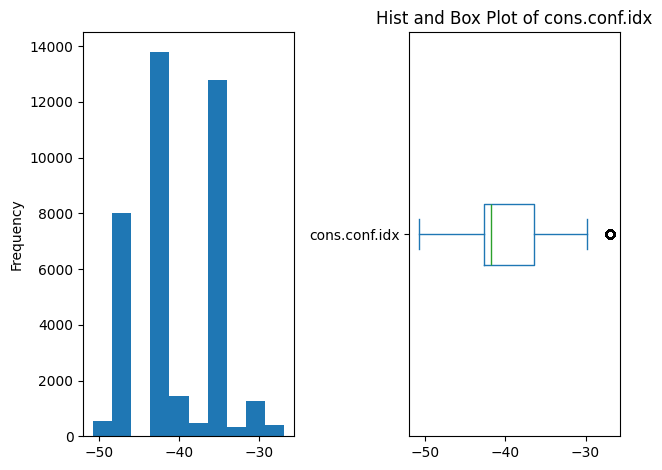

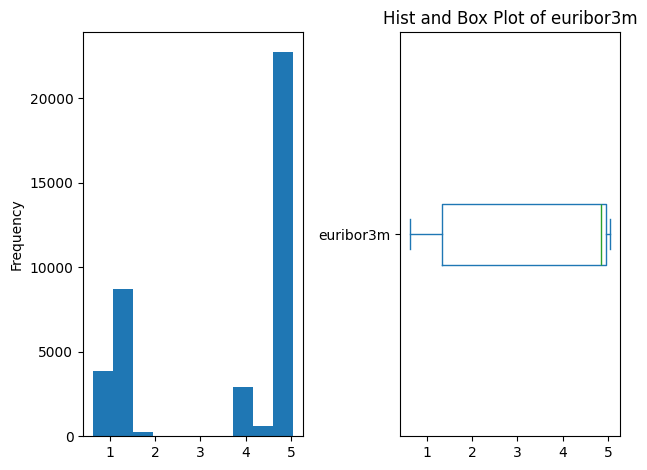

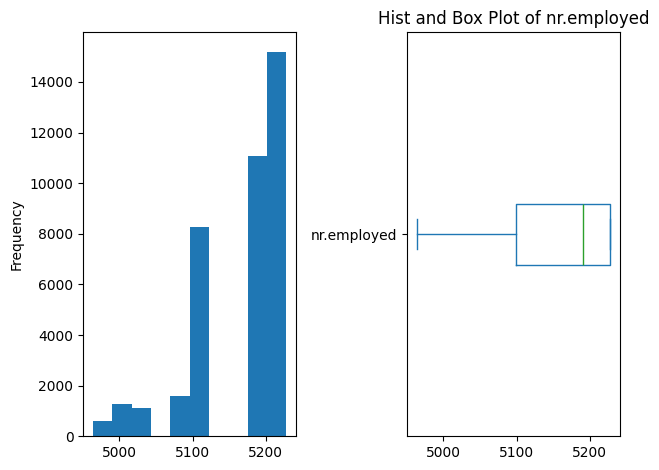

In [11]:
# Hist and Box Plots of Numerical Features
# Hist, box plots of campaign, duration seems useful
for att in numerical_features:
    plt.subplot(1,2,1)
    df[att].plot.hist()
    plt.subplot(1,2,2)
    df[att].plot.box(vert=False)
    plt.title("Hist and Box Plot of "+att)
    plt.tight_layout()
    plt.show()


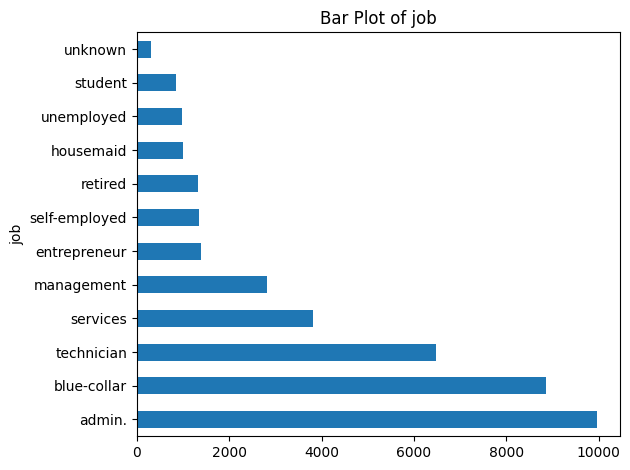

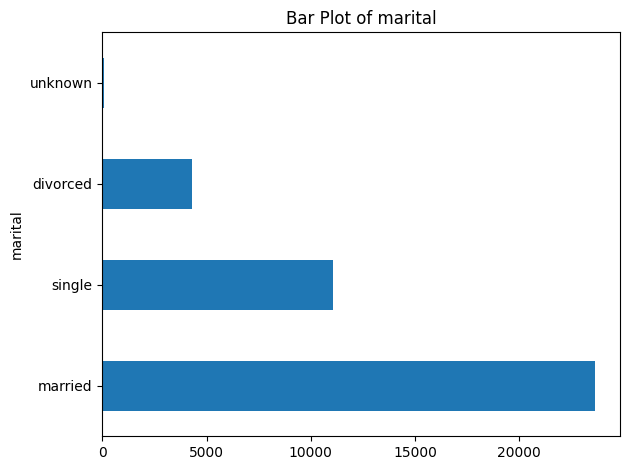

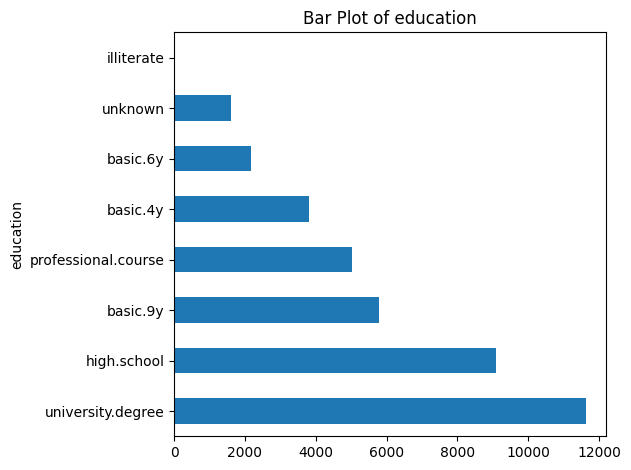

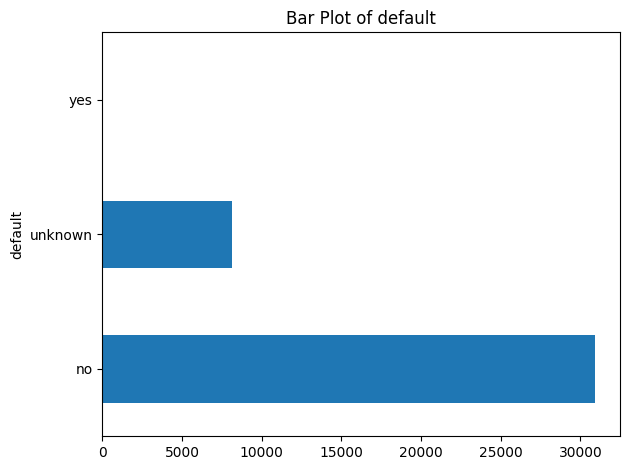

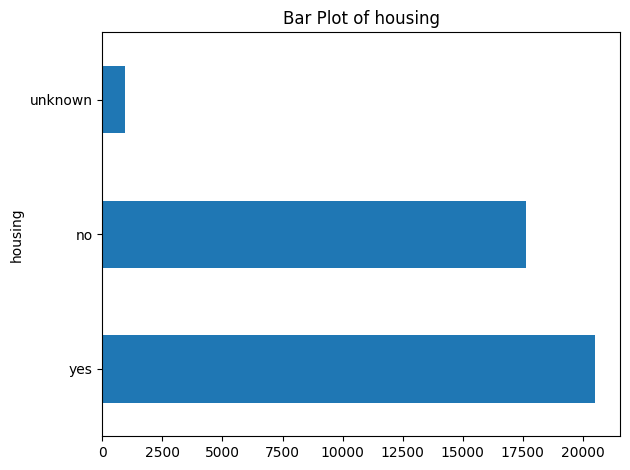

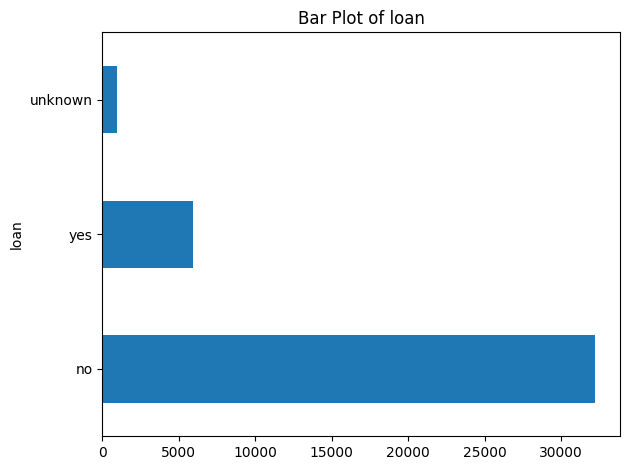

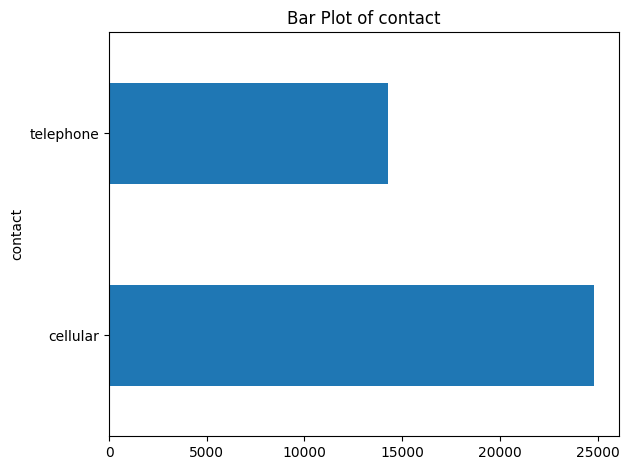

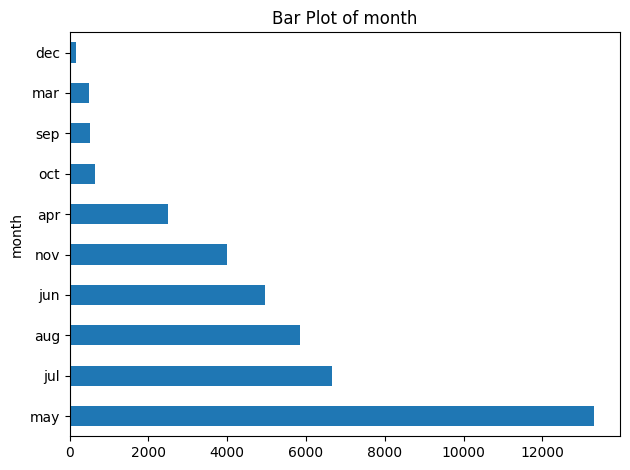

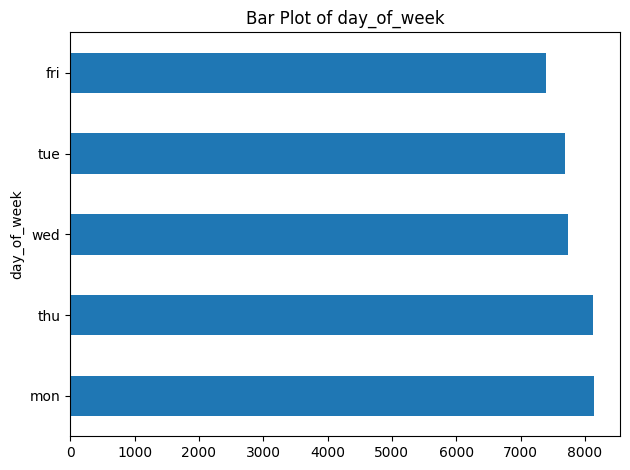

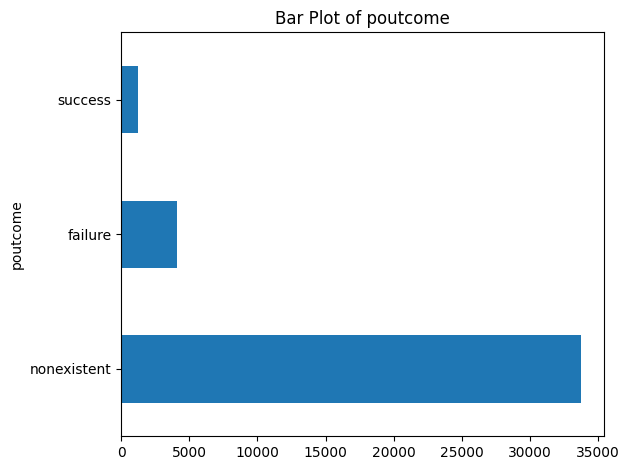

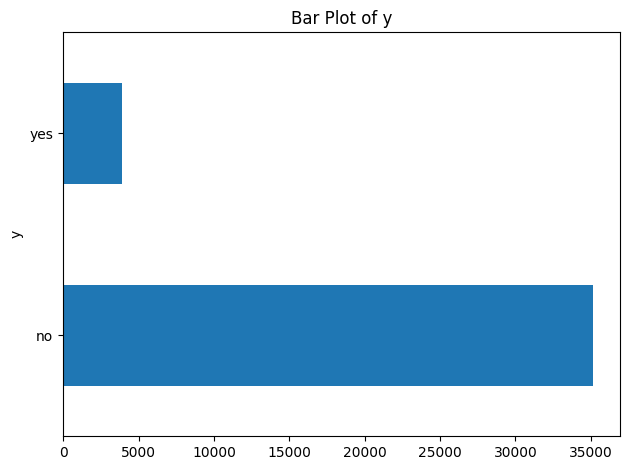

In [13]:
# Hist and Box Plots of Categorical Features
# Understand categorical features distribution
for att in categorical_features:
    df[att].value_counts().plot.barh()
    plt.title("Bar Plot of "+att)
    plt.tight_layout()
    plt.show()

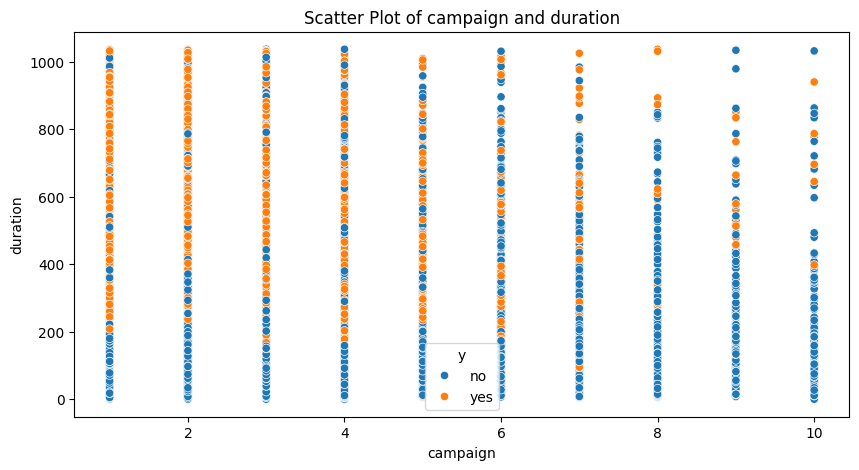

In [21]:
# Understand relationship between campaign and duration via scatter plot
#Observation: The term deposit acceptance is higher when there are optimal campaigns (less than 10) and call duration is between 200-800 seconds
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='campaign', y='duration', hue = 'y')
plt.title("Scatter Plot of campaign and duration")
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [ ]:
# Business objective: My goal is to compare the performance of various classifiers namely 'K Nearest Neighbors(KNN)', 'Logistic Regression', 'Decision Trees', and 'Support Vector Machines(SVC)'.
# Dataset: The banking dataset
# The target variable is 'y' - has the client subscribed a term deposit?

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [22]:
# Encode Numerical and Categorical columns and perform column transformation
X = df.drop('y', axis=1)
y = df.y

le = LabelEncoder()
y = le.fit_transform(y)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [23]:
# Split the data with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [24]:
# Baseline Accuracy to beat
baseline_accuracy = df['y'].value_counts(normalize=True).max()

print(f"Baseline Accuracy: {baseline_accuracy}")

Baseline Accuracy: 0.899516636403161


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [25]:
#Logistic Regression Model
lgr = Pipeline ([
     ('preprocessor', preprocessor),
     ('lgr', LogisticRegression())])
start_time = time.time()
lgr.fit(X,y)
fit_time = (time.time() - start_time)

###Problem 9: Score the Model

What is the accuracy of your model?

In [26]:
lgr_train_score = lgr.score(X,y)
lgr_test_score = lgr.score(X_test,y_test)
print(lgr)
print(lgr_train_score)
print(lgr_test_score)
print(fit_time)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                 

In [27]:
results = []
results.append(['LogisticRegression()', fit_time, lgr_train_score, lgr_test_score ])
print(results)

[['LogisticRegression()', 0.7235226631164551, 0.9203600930922483, 0.9189361974172101]]


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [28]:
# Get scores from 3 more models for comparision. Total 4 models including Logistic Regression

#KNN Model
knn = Pipeline ([
     ('preprocessor', preprocessor),
     ('knn', KNeighborsClassifier())])
start_time = time.time()
knn.fit(X,y)
fit_time = (time.time() - start_time)
knn_train_score = knn.score(X,y)
knn_test_score = knn.score(X_test,y_test)
print(knn)
print(knn_train_score)
print(knn_test_score)
print(fit_time)
results.append(['KNeighborsClassifier()', fit_time, knn_train_score, knn_test_score ])
print(results)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                 

In [29]:
#DecisionTree Model
dtree = Pipeline ([
     ('preprocessor', preprocessor),
     ('dtree', DecisionTreeClassifier())])
start_time = time.time()
dtree.fit(X,y)
fit_time = (time.time() - start_time)
dtree_train_score = dtree.score(X,y)
dtree_test_score = dtree.score(X_test,y_test)
print(dtree)
print(dtree_train_score)
print(dtree_test_score)
print(fit_time)
results.append(['DecisionTreeClassifier()', fit_time, dtree_train_score, dtree_test_score ])
print(results)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                 

In [30]:
#SVM Model
svm = Pipeline ([
     ('preprocessor', preprocessor),
     ('svc',  SVC())])
start_time = time.time()
svm.fit(X,y)
fit_time = (time.time() - start_time)
svm_train_score = svm.score(X,y)
svm_test_score = svm.score(X_test,y_test)
print(svm)
print(svm_train_score)
print(svm_test_score)
print(fit_time)
results.append(['SVC()', fit_time, svm_train_score, svm_test_score ])
print(results)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                 

In [31]:
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Model', inplace=True)
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
LogisticRegression(),0.723523,0.920360,0.918936
KNeighborsClassifier(),0.167234,0.935193,0.934152
DecisionTreeClassifier(),0.511581,1.000000,1.000000
SVC(),34.222864,0.929388,0.928142


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [32]:
# Should we keep gender? Explore next
# Models performed well with higher accuracy with all features included, so not removing any specific features

In [33]:
# Define the models and hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 3, 7]}),
    'svc': (SVC(), {'svc__C': [0.1, 3, 7], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [3, 5, 7]})
}


In [34]:
# Incorporate GridSearch along with Confusion Matrix, Accuracy, Recall, F1-Score and Precision

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return cm, accuracy, recall, f1, precision


Improved_results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    # Evaluate the model
    cm, accuracy, recall, f1, precision = evaluate_model(best_model, X_test, y_test)

    # Append the results
    Improved_results.append([name, fit_time, train_score, test_score, accuracy, recall, f1, precision])

# Create the results DataFrame
Improved_results_df = pd.DataFrame(Improved_results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Accuracy', 'Recall', 'F1-score', 'Precision'])
Improved_results_df.set_index('Model', inplace=True)

# Display the results
Improved_results_df

,Train Time,Train Accuracy,Test Accuracy,Accuracy,Recall,F1-score,Precision
Model,,,,,,,
knn,11.558871,0.931682,0.909858,0.909858,0.391192,0.461421,0.562384
logisticregression,2.179765,0.920237,0.918169,0.918169,0.413212,0.499218,0.630435
svc,108.366382,0.941113,0.919831,0.919831,0.395078,0.493129,0.655914
decisiontreeclassifier,1.185957,0.926630,0.920598,0.920598,0.445596,0.525592,0.640596


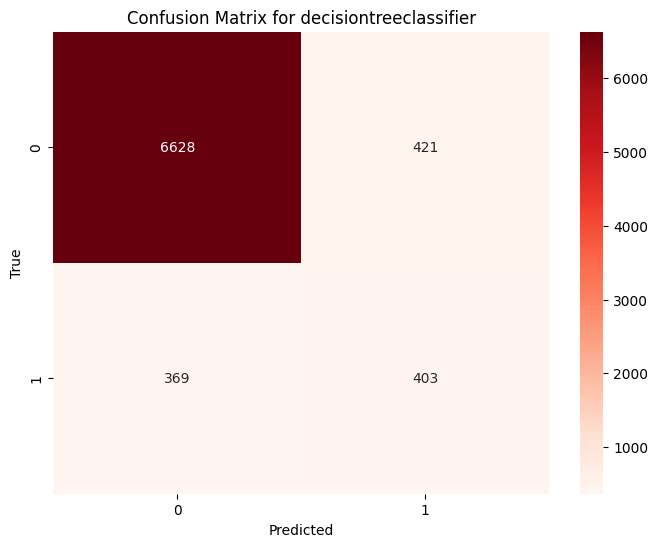

In [35]:
# Visualize the confusion matrix for the best performing model
best_model_name = Improved_results_df['Recall'].idxmax()
best_model = models[best_model_name][0]
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    (best_model_name, best_model)
])
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()

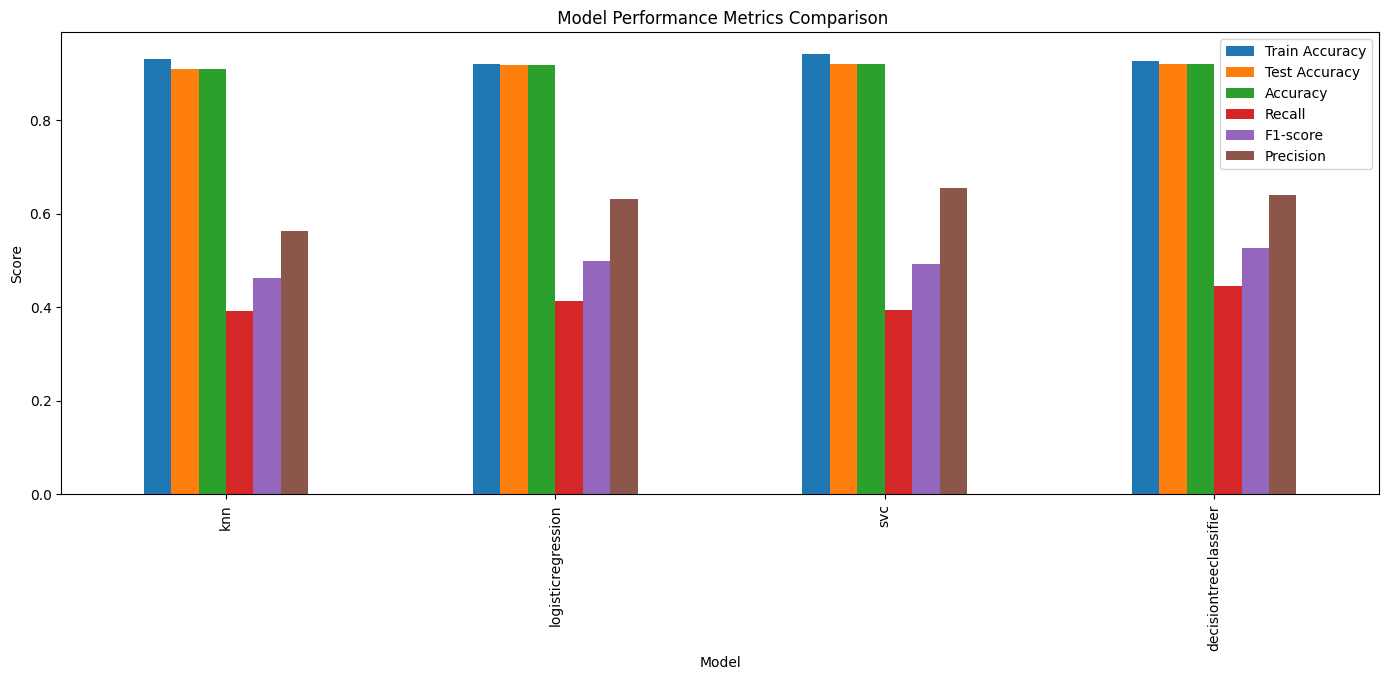

In [37]:
#Remove the train time as it is distorting the results
Improved_results_df_no_train_time = Improved_results_df.drop(columns=['Train Time'])

Improved_results_df_no_train_time.plot(kind='bar', figsize=(17, 6))
plt.title(' Model Performance Metrics Comparison')
plt.ylabel('Score')
plt.show()

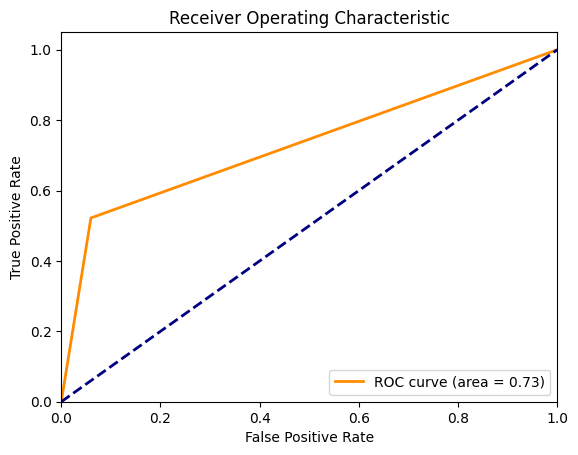

In [39]:
from sklearn.metrics import roc_curve, auc

X_test_preprocessed = preprocessor.transform(X_test)

y_pred_proba = best_model.predict_proba(X_test_preprocessed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


##### Questions